## Turistic Data from Maczek
Import data, and clean it (thoroughly...)

In [1]:
import pandas as pd
import xlrd
import numpy as np


**Initial load - raw data**

In [3]:
df = pd.read_excel("../data/Copy of wyniki baza danych 5 dec 2018.xls", 
header=0, convert_float=True)
df.head()


,1a,1b,1c,1d,komfort,1f,1g,1h,zabytki,1j,...,M2a,M2b,M3,M4a,m4b,M4c,M5a,M5b,M5c,M5d
0,4,3,4,4,4,3,4,5,4,3,...,NaN,1,ukraina,NaN,1,NaN,NaN,NaN,1,NaN
1,3,4,3,2,4,2,4,2,2,5,...,NaN,1,ukraina,NaN,NaN,1,NaN,NaN,1,NaN
2,3,4,3,5,4,2,1,5,5,3,...,1,NaN,ukraina,NaN,NaN,1,NaN,NaN,1,NaN
3,4,4,3,4,5,4,2,4,3,4,...,NaN,1,ukraina,NaN,1,NaN,NaN,1,NaN,NaN
4,4,5,5,5,5,3,4,4,4,5,...,1,NaN,ukraina,NaN,NaN,1,NaN,1,NaN,NaN


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(df).to_file(outputfile='../output/pd_profile.html')

### Cleaning
**basic cleaning:**
clean shit - repeating headers, hidden spaces, empty cols

In [4]:
df = df[df.komfort != 'komfort']
df = df.applymap(lambda x: x.strip() if type(x) is str else x)
df=df.apply(pd.to_numeric, errors='ignore')
df.dropna(axis='columns', how="all", inplace=True)
df.dropna(axis='rows', how="all", inplace=True)
df.shape


(410, 130)

**Deeper cleaning and filtering:**

In [5]:
#save pre-cleaned stuff to OUTPUT,
#MOVE to DATA
#DO manual cleaning in excel - change word-headers into num-letter (so we have correct sequence)
#+ substitute 3 "booking" with NAN

df.to_csv("../output/cleaned_data.csv")

In [2]:
#get new df1 from cleaned data

df1 = pd.read_csv('../data/cleaned_data.csv', index_col=0)
pd.set_option('display.max_columns', 500)
df1.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,inne,2a,2b,2c,2d,2e,2f,2g,2h,2i,inne.1,3a,3b,3c,3d,3e,3f,inne.2,3h,3i,3j,3k,3l,3m,inne.3,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,inne.4,5a,5b,5c,5d,5e,inne.5,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,8a,8b,8c,8d,8e,8f,8g,8h,8i,8j,8k,8l,8m,8n,8o,8p,8q,8r,8s,8t,8u,8v,8w,8x,8y,9a,9b,9c,9d,9e,9f,9g,9h,9i,9j,9k,M1,M2a,M2b,M3,M4a,m4b,M4c,M5a,M5b,M5c
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,NaN,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,NaN,3,3,3.0,5,2,3,NaN,4,2,4.0,4.0,2,2.0,NaN,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,NaN,3.0,3,3,3.0,3.0,NaN,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,5.0,2.0,3.0,3.0,3.0,3.0,22.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,NaN,1.0
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,NaN,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,NaN,4,4,3.0,3,2,5,NaN,4,3,2.0,2.0,2,4.0,1,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,NaN,2.0,2,4,4.0,3.0,NaN,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,4.0,5.0,3.0,4.0,3.0,1.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,18.0,NaN,1.0,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,NaN,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,NaN,5,5,4.0,2,3,4,NaN,5,4,4.0,4.0,4,4.0,NaN,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,NaN,5.0,5,5,4.0,1.0,NaN,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,4.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,5.0,5.0,3.0,20.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,NaN,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,NaN,4,4,5.0,4,5,5,NaN,3,4,3.0,4.0,5,5.0,NaN,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,NaN,5.0,5,5,5.0,2.0,NaN,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,4.0,5.0,4.0,21.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,1.0,NaN
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,NaN,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,NaN,5,5,5.0,4,5,5,NaN,3,4,4.0,3.0,4,4.0,NaN,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,NaN,4.0,3,4,4.0,2.0,NaN,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,2.0,22.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,1.0,NaN


In [3]:
#good, now let's drop "inne"

df1.drop(axis=1, columns=['inne', 'inne.1', 'inne.2', 'inne.3', 'inne.4', 'inne.5'], inplace=True)
df1.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,8a,8b,8c,8d,8e,8f,8g,8h,8i,8j,8k,8l,8m,8n,8o,8p,8q,8r,8s,8t,8u,8v,8w,8x,8y,9a,9b,9c,9d,9e,9f,9g,9h,9i,9j,9k,M1,M2a,M2b,M3,M4a,m4b,M4c,M5a,M5b,M5c
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,3,3,3.0,5,2,3,4,2,4.0,4.0,2,2.0,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,5.0,2.0,3.0,3.0,3.0,3.0,22.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,NaN,1.0
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,4,4,3.0,3,2,5,4,3,2.0,2.0,2,4.0,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,2.0,2,4,4.0,3.0,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,4.0,5.0,3.0,4.0,3.0,1.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,18.0,NaN,1.0,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,5,5,4.0,2,3,4,5,4,4.0,4.0,4,4.0,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5,5,4.0,1.0,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,4.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,5.0,5.0,3.0,20.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,4,4,5.0,4,5,5,3,4,3.0,4.0,5,5.0,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5,5,5.0,2.0,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,4.0,5.0,4.0,21.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,1.0,NaN
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,5,5,5.0,4,5,5,3,4,4.0,3.0,4,4.0,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,4.0,3,4,4.0,2.0,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,2.0,22.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,1.0,NaN


Filter out those not from Poland or Ukraine

In [4]:
df2 = df1[(df1['M3']=='ukraina') | (df1["M3"]=='polska')]
df2.shape

(381, 124)

Create report for cleaned and filtered data

In [10]:
import pandas_profiling
pandas_profiling.ProfileReport(df2).to_file(outputfile='../output/pd_profile_clean.html')

In [44]:
#Check age distribution:
from scipy import stats
stats.percentileofscore(df2.M1, 23)

87.79527559055119

In [43]:
perc=[87, 88, 89, 90, 91,92,93,94,95,96,97,98,99,100]
val=np.nanpercentile(df2.M1,perc)
pd.Series(val,index=perc)

87     23.00
88     23.00
89     23.00
90     24.00
91     24.00
92     24.00
93     25.00
94     26.00
95     26.05
96     28.00
97     29.00
98     31.00
99     32.00
100    50.00
dtype: float64

In [45]:
#Remove boolean M-columns
df3 = df2.iloc[:, 0:78]
df3['age']=df2['M1']
df3['country']=df2['M3']
df3.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,age,country
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,3,3,3.0,5,2,3,4,2,4.0,4.0,2,2.0,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0,22.0,ukraina
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,4,4,3.0,3,2,5,4,3,2.0,2.0,2,4.0,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,2.0,2,4,4.0,3.0,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,18.0,ukraina
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,5,5,4.0,2,3,4,5,4,4.0,4.0,4,4.0,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5,5,4.0,1.0,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0,20.0,ukraina
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,4,4,5.0,4,5,5,3,4,3.0,4.0,5,5.0,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5,5,5.0,2.0,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,21.0,ukraina
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,5,5,5.0,4,5,5,3,4,4.0,3.0,4,4.0,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,4.0,3,4,4.0,2.0,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,22.0,ukraina


In [49]:
df3.shape

(381, 80)

### Analysis

**$\phi_k$ correlations**

In [50]:
import phik
from phik import resources, report

In [61]:
#correlation
cor_matrix=df3.phik_matrix(interval_cols=['age'])
cor_matrix

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 33.0 - 36.39999999999999
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 36.39999999999999 - 39.8
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 39.8 - 43.2
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))


var2,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,age,country
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1a,1.000000,0.462051,0.143883,0.000000,0.000000,0.088160,0.387927,0.160397,0.317245,0.192459,0.275333,0.210806,0.000000,0.309673,0.210118,0.000000,0.000000,0.305858,0.000000,0.329909,0.172848,0.195033,0.128184,0.134604,0.364399,0.161384,0.337605,0.120338,0.601680,0.173350,0.160782,0.119120,0.209576,0.088879,0.183772,0.335579,0.236196,0.000000,0.209987,0.142257,0.000000,0.232523,0.229273,0.347219,0.000000,0.066277,0.000000,0.290866,0.018195,0.274166,0.241624,0.264498,0.042143,0.163957,0.084510,0.210367,0.257051,0.086511,0.049573,0.157943,0.496575,0.393536,0.111030,0.000000,0.273700,0.469793,0.454170,0.275648,0.133964,0.221118,0.326915,0.090545,0.043838,0.000000,0.000000,0.000000,0.000000,0.152139,0.000000,0.061425
1b,0.462051,1.000000,0.063966,0.209165,0.132752,0.173585,0.071740,0.214737,0.124286,0.266665,0.000000,0.069554,0.412807,0.158462,0.260392,0.131796,0.000000,0.147395,0.000000,0.337170,0.201131,0.409537,0.149253,0.044095,0.130580,0.000000,0.469367,0.205543,0.240001,0.155986,0.238159,0.761347,0.234280,0.000000,0.210304,0.213217,0.309188,0.291468,0.173110,0.201465,0.000000,0.774942,0.016518,0.000000,0.160164,0.000000,0.180418,0.000000,0.000000,0.234100,0.000000,0.117898,0.000000,0.090394,0.173673,0.333877,0.117897,0.000000,0.160471,0.141482,0.718588,0.282082,0.133590,0.167952,0.000000,0.714982,0.205194,0.245671,0.117712,0.095209,0.084926,0.195632,0.000000,0.000000,0.149333,0.000000,0.341699,0.217551,0.000000,0.041041
1c,0.143883,0.063966,1.000000,0.256537,0.073663,0.179286,0.190814,0.262935,0.219343,0.080549,0.724921,0.000000,0.000000,0.219776,0.118481,0.290924,0.314242,0.197800,0.281238,0.146025,0.393166,0.189580,0.000000,0.192588,0.171501,0.000000,0.000000,0.283444,0.311803,0.193592,0.000000,0.035324,0.236028,0.361006,0.367752,0.271024,0.265407,0.150926,0.249002,0.200131,0.165482,0.068687,0.269332,0.000000,0.133590,0.000000,0.250009,0.337523,0.000000,0.204893,0.081033,0.000000,0.186943,0.000000,0.223331,0.181642,0.057959,0.103566,0.395313,0.000000,0.049821,0.204245,0.231965,0.281711,0.000000,0.201397,0.264203,0.000000,0.119291,0.207964,0.195458,0.218513,0.154899,0.180453,0.108791,0.000000,0.000000,0.105674,0.000000,0.000000
1d,0.000000,0.209165,0.256537,1.000000,0.442755,0.093927,0.113862,0.154028,0.000000,0.341572,0.425913,0.302990,0.350462,0.302136,0.363263,0.272886,0.398451,0.186323,0.266410,0.338760,0.090517,0.302266,0.112382,0.254701,0.000000,0.134802,0.223305,0.256320,0.239741,0.254939,0.306625,0.282019,0.244606,0.411390,0.368730,0.000000,0.277854,0.261599,0.205669,0.426570,0.279505,0.369870,0.183626,0.371473,0.190976,0.157365,0.066439,0.257027,0.206853,0.168643,0.000000,0.098634,0.489640,0.259168,0.270231,0.075519,0.000000,0.145806,0.121055,0.189697,0.375013,0.297363,0.266022,0.550439,0.272576,0.153170,0.319628,0.227798,0.086526,0.217650,0.387472,0.000000,0.000000,0.091089,0.146347,0.000000,0.176339,0.170874,0.000000,0.153517
1e,0.000000,0.132752,0.073663,0.442755,1.000000,0.315019,0.318242,0.224239,0.093393,0.714274,0.192677,0.275713,0.456408,0.435007,0.381769,0.208945,0.119789,0.125872,0.120636,0.176807,0.203551,0.107855,0.000000,0.181063,0.108104,0.121914,0.270181,0.205156,0.033255,0.158271,0.339492,0.541439,0.250010,0.399091,0.338693,0.000000,0.137957,0.261106,0.307066,0.350582,0.266664,0.134792,0.381880,0.587366,0.404095,0.257172,0.355367,0.211297,0.582860,0.000000,0.000000,0.166914,0.000000,0.167041,0.258683,0.000000,0.135586,0.194891,0.352169,0.380673,0.464713,0.296671,0.496121,0.472094,0.632047,0.036858,0.052923,0.345603,0.155623,0.134198,0.477285,0.166667,0.140953,0.131285,0.195305,0.000000,0.195065,0.096435,0.192605,0.000000
1f,0.088160,0.173585,0.179286,0.093927,0.315019,1

In [57]:
#significance
sig_matrix = df3.significance_matrix(interval_cols=['age'])

NameError: name 'plot_correlation_matrix' is not defined

In [58]:
sig_matrix

var2,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,age,country
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1a,30.005885,1.462709,0.862877,-0.628134,-1.328442,0.395935,3.178184,0.783446,2.492897,1.163975,1.497490,1.345091,-0.568804,2.305361,1.004395,0.513330,-0.162228,2.647252,-2.596914,2.620151,0.971943,0.988223,0.425970,0.681967,3.562134,0.847086,2.208769,-0.349626,8.029669,0.839064,0.796705,-0.572794,1.179033,0.086817,0.936629,2.346348,1.145541,-0.583251,1.269158,1.056179,-0.303171,0.000254,1.188036,1.004779,-0.279491,0.174802,-0.569710,1.128737,0.320359,2.190878,2.029423,1.708935,0.454879,0.899430,0.103433,1.264914,1.672309,0.338856,0.199133,0.265002,5.069756,3.339382,0.589118,0.333587,2.341434,2.822236,2.098628,1.465545,0.891092,1.152209,1.711091,0.162913,0.201247,-1.126619,-0.633384,-0.889291,-2.148064,0.354526,0.378365,0.800371
1b,1.462709,28.478662,0.889619,1.653328,0.991187,1.169598,0.054483,1.769631,1.352722,2.429770,-0.263982,0.360277,4.488394,1.003922,2.151890,0.762443,-1.051264,1.218228,0.442037,3.429931,1.320609,3.303645,1.139868,0.435217,0.558079,-0.620712,3.203453,1.690483,0.747646,1.465022,1.867152,9.621315,1.819580,-0.545878,0.349695,0.536089,1.496951,2.800357,1.804810,2.096677,0.297690,9.524943,0.593661,-0.369475,1.112518,-0.089741,1.469309,-0.140326,0.248900,1.376597,-0.528812,1.084676,-1.774198,0.425401,0.211310,0.066503,-0.310227,-0.035945,1.337603,0.801406,0.745048,0.789361,1.201018,1.542944,-0.712993,8.072994,1.563968,2.180191,1.978948,0.388644,0.567827,1.475039,0.095076,-0.694663,1.221722,-0.721950,2.705040,1.225009,-0.108579,0.625981
1c,0.862877,0.889619,30.069029,1.571399,0.649741,1.248182,1.169410,1.914578,1.129266,0.819166,9.770862,0.148888,0.180610,1.224393,0.797970,2.321868,2.949862,1.389088,1.818841,0.824369,4.026097,1.252715,-0.504661,0.594095,1.024156,-0.618081,0.381079,1.988915,2.303858,1.421520,-1.398737,0.490714,1.989484,3.346179,4.149426,2.033030,2.059814,0.645201,1.737010,1.880527,0.480536,0.834252,2.168540,0.238431,0.918664,0.049088,1.864527,2.522038,0.067997,1.055362,0.730970,-0.556945,1.136335,-0.070404,1.471641,0.846820,0.212863,0.811560,4.468352,-0.126269,0.477829,1.910792,1.277867,2.556904,-0.431880,1.823927,1.268110,-0.276389,2.067285,1.410320,1.964183,1.347937,0.759789,0.875758,0.528283,-0.445217,-0.136416,0.255950,1.408906,-0.789210
1d,-0.628134,1.653328,1.571399,27.787567,4.370522,0.601098,0.521180,0.511638,-0.110577,3.181331,2.472572,2.493707,3.406295,2.223977,2.907493,1.892794,3.518251,1.206346,1.514128,2.935128,0.191047,3.085752,0.892278,1.382492,-0.237741,0.555811,1.796351,1.830346,1.563343,1.649350,2.252966,2.201483,1.265931,3.312860,2.837428,-1.268464,2.044657,1.406409,1.061264,4.553323,2.614843,3.567739,1.301500,3.616634,1.062647,2.671931,0.034152,2.155588,1.796089,0.692561,-0.313301,0.317149,4.054562,2.238357,1.506983,-0.139484,0.173161,0.313622,0.358629,1.018929,3.174402,1.940946,2.211762,6.673554,2.543896,1.002076,3.103543,1.783521,0.989084,1.332602,3.138646,-0.314858,-0.162714,0.738179,0.653942,-0.419045,1.181066,0.400027,-0.203713,3.112714
1e,-1.328442,0.991187,0.649741,4.370522,27.266565,2.354375,3.309336,1.365409,0.663483,7.866309,0.009105,2.380542,5.221440,4.680328,3.478080,1.959505,0.215587,0.390043,1.017768,1.553452,1.431855,0.655290,-0.771891,0.237863,0.340279,-0.259557,2.330024,1.553561,1.052800,0.821223,3.380827,2.131033,0.974476,2.504322,2.225440,-0.015818,1.110916,2.283799,2.938772,3.714821,1.957920,1.044274,4.016725,5.083358,4.635069,2.758217,3.343696,1.610438,7.886747,0.168769,-0.488205,0.554264,-0.963604,0.988405,0.665314,0.131834,0.927870,1.113274,1.537358,2.493111,3.990776,2.477574,5.522684,2.106750,4.024255,0.517184,0.611040,3.308535,2.903211,1.106368,2.157567,1.122923,0.810188,0.819536,1.263788,-0.007031,1.367243,0.753475,0.47

In [62]:
#both matrices to csv output
sig_matrix.to_csv('../output/sig_matrix.csv')
cor_matrix.to_csv('../output/cor_matrix.csv')

**Outliers significance**
<br> age, 3d, 7c, 4j, 5a, 3c, 3h

In [66]:
import matplotlib.pyplot as plt
from phik.report import plot_correlation_matrix
%matplotlib inline

In [94]:
def plot_outlier_sig(c):
    bins=[0,1,2,3,4,5]
    outlier_signifs, binning_dict = df3[[c[0],c[1]]].outlier_significance_matrix(bins=bins,retbins=True)
    zvalues = outlier_signifs.values
    xlabels = binning_dict[c[1]] if c[1] in binning_dict.keys() else outlier_signifs.columns
    ylabels = binning_dict[c[0]] if c[0] in binning_dict.keys() else outlier_signifs.index
    xlabel = c[1]
    ylabel = c[0]

    plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=xlabel,y_label=ylabel,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=0.9,figsize=(5,6))

interval_cols not set, guessing: ['3d']
interval_cols not set, guessing: ['7c']
interval_cols not set, guessing: ['4j']
interval_cols not set, guessing: ['5a']
interval_cols not set, guessing: ['3c']
interval_cols not set, guessing: ['3h']


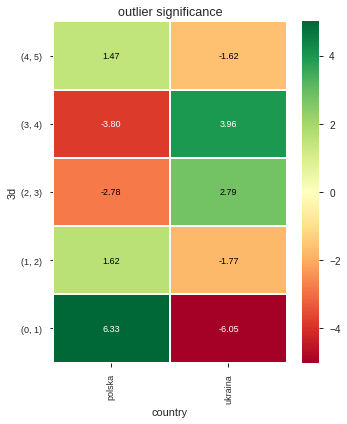

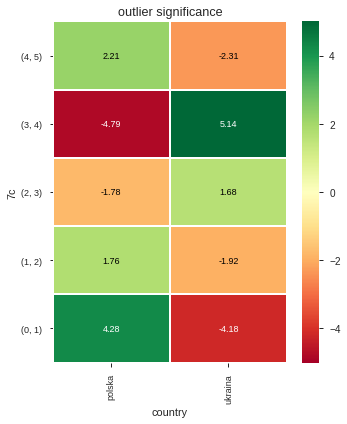

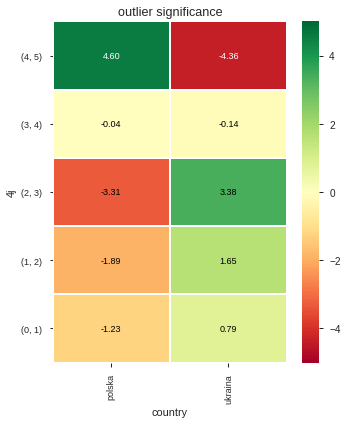

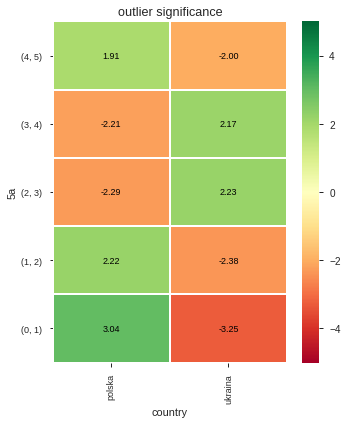

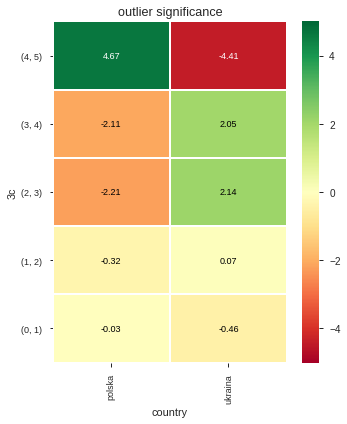

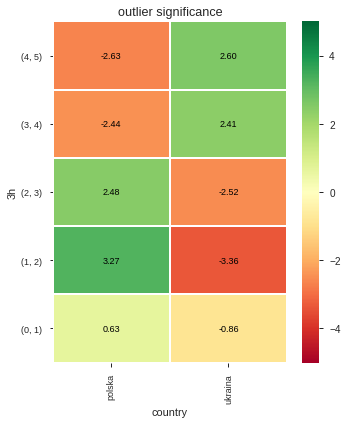

In [96]:
pairs=[["3d","country"],
      ["7c","country"],
      ["4j","country"],
      ["5a","country"],
      ["3c","country"],
      ["3h","country"]
      ]

for pair in pairs:
    plot_outlier_sig(pair)

## Further thoughts
- pairwise - weak correlations, low significance
- apply age brakets (guess: no diff)
- try predicting (LM? SVM?) - then get variable significance (if accuracy too low - any added info in var significance?)
- find other stat test